In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk1-task3-earthquakes.ipynb")

# Task 3: `pandas` fundamentals with earthquake data

## Instructions
- First, update the following cell to have a link to *your* Homework 1 GitHub repository:

**UPDATE THIS LINK:**

[https://github.com/ceh58/eds220-hwk1]()

- This task covers topics on the lessons on [subsetting `pandas.DataFrames`](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-3-pandas-subsetting/lesson-3-pandas-subsetting.html) and [plotting](). The best strategy to solve it is to get together with your classmates and work on it together after these lecture.

- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits at moments you think are adequate.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with `otter` import** this is used internally for grading.


## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is given in a single CSV file within the`data` folder (`data/earthquake_data.csv`) and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

<!-- BEGIN QUESTION -->

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it in the `raw_eqk` variable.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt # For histogram
raw_eqk = pd.read_csv('data/earthquake_data.csv')

<!-- END QUESTION -->

Look at the head of the dataframe. Store the result in the `raw_eqk_head` variable. 

In [2]:
raw_eqk_head = raw_eqk.head()

In [3]:
# View the dataframe
raw_eqk_head

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe. Store your answer in the `raw_ekq_shape` variable.

In [4]:
raw_ekq_shape = raw_eqk.shape

b. Store the type of `raw_eqk`'s shape in the `raw_eqk_shape_type` variable.

In [5]:
raw_eqk_shape_type = type(raw_ekq_shape)

In [6]:
# View the dataframe
raw_eqk_shape_type

tuple

c. Extract *only* the number of rows by accessing it from `raw_eqk`'s shape.Store your answer in the `num_rows` variable.  HINT: how do you index an element in a tuple?

In [7]:
num_rows = raw_eqk.shape[0]

## 3

Get the unique values of the type of events. Store your answer in the `unique_events` variable.

In [8]:
unique_events = raw_eqk['type'].nunique()

# 4

a. Select only earthquake events and store them as `eqk` (variable name). Update the index of `eqk` to be the `id` column of the dataframe. 

In [9]:
eqk = raw_eqk[raw_eqk['type'] == "earthquake"]

In [10]:
# View the dataframe
eqk

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ak11453391,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ak11453395,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,nc72358451,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ak11453390,"57km NW of Ester, Alaska",earthquake


b. Check the new index by viewing the first 3 rows of `eqk`. Store your results in the `eqk_3` variable. 

In [11]:
eqk_3 = eqk.head(3)

In [12]:
# View the dataframe
eqk_3

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? Store your answer in the `ommitted_events` variable. 

HINT: There are *many* ways you can get this information. One could be to use (2). 

In [13]:
omitted_events = num_rows - eqk.shape[0]

<!-- BEGIN QUESTION -->

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

Text(0, 0.5, 'Count')

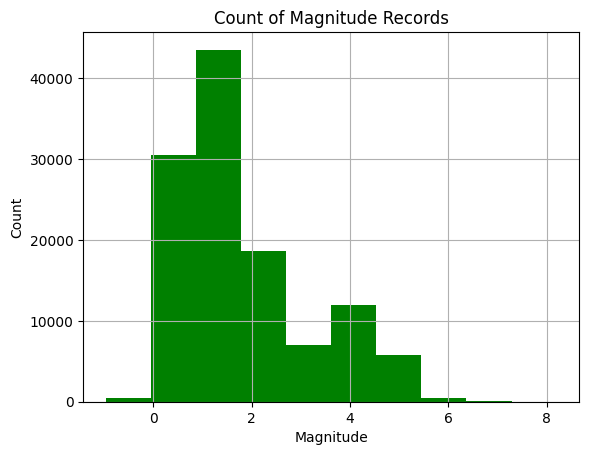

In [14]:
eqk['mag'].hist(color = "green")
plt.title("Count of Magnitude Records")
plt.xlabel("Magnitude")
plt.ylabel("Count")

<!-- END QUESTION -->

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: check the method [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

In [19]:
top20 = eqk['mag'].nlargest(n=20, keep='first')

# Extra code to reset the index
#.reset_index(drop = True)
#top20.index += 1

In [20]:
# View the dataframe 
top20

37371     8.2
50562     7.9
36918     7.7
33808     7.6
31496     7.5
33537     7.4
95913     7.3
31850     7.2
34318     7.1
106285    7.1
111052    7.1
97602     7.0
14025     6.9
37367     6.9
39915     6.9
47934     6.9
50609     6.9
61294     6.9
66278     6.9
78063     6.9
Name: mag, dtype: float64

<!-- BEGIN QUESTION -->

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

Text(0, 0.5, 'Magnitude')

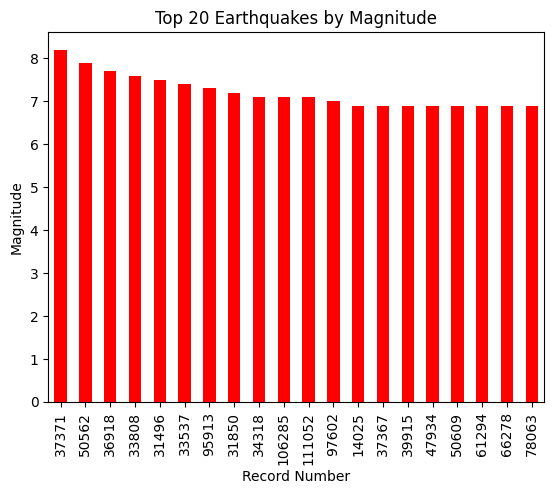

In [21]:
top20.plot.bar(x = top20.index, y = "mag", color = "red")
plt.title("Top 20 Earthquakes by Magnitude")
plt.xlabel("Record Number")
plt.ylabel("Magnitude")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

The index is a unique identifier and the label for the x axis of this graph. We should update to reflect the number in the top 20 series.

<!-- END QUESTION -->

# 8 
We are interested in the place, magnitude, and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame. Store your answer in the `top20_filtered` variable. 

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [27]:
top20_filtered = eqk.loc[top20.index, ['place', 'mag', 'depth']]

In [28]:
# View the dataframe
top20_filtered

,place,mag,depth
37371,"94km NW of Iquique, Chile",8.2,25.00
50562,"19km SE of Little Sitkin Island, Alaska",7.9,109.00
36918,"53km SW of Iquique, Chile",7.7,22.40
33808,"93km SSE of Kirakira, Solomon Islands",7.6,22.56
31496,"70km SW of Panguna, Papua New Guinea",7.5,43.37
33537,"112km S of Kirakira, Solomon Islands",7.4,39.00
95913,"74km S of Intipuca, El Salvador",7.3,40.00
31850,"33km ESE of Petatlan, Mexico",7.2,24.00
34318,"56km WSW of Panguna, Papua New Guinea",7.1,60.53
106285,"154km NW of Kota Ternate, Indonesia",7.1,45.00


<!-- BEGIN QUESTION -->

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


Text(0.5, 1.0, 'Map of Earthquakes with > 5 Magnitude')

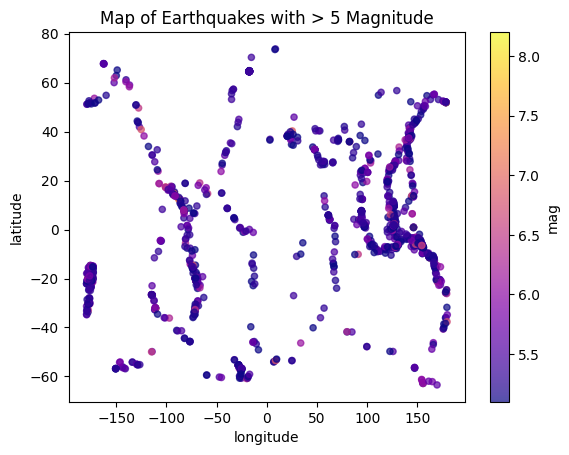

In [40]:
eqk[eqk['mag'] > 5].plot.scatter(x = "longitude", y = "latitude", 
                                 c = "mag", alpha = 0.7, colormap = "plasma")
plt.title("Map of Earthquakes with > 5 Magnitude")

<!-- END QUESTION -->

